# Datacamp Data Analyst Associate Practical Exam Submission

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Task 1

### a. State whether the values match the description

In [140]:
df = pd.read_csv('food_claims_2212.csv')
df.head()


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


- Column **number of claims** does not match the description. As per the description, the data type of the column should be **continuous** but the value of the column indicates that there is a **currency symbol** in front of the claim values

### b. State the number of missing values in the column.

In [141]:
df_Null = df.isna().sum().sort_values()
df_Null.drop(df_Null.loc[df_Null == 0].index, inplace=True)

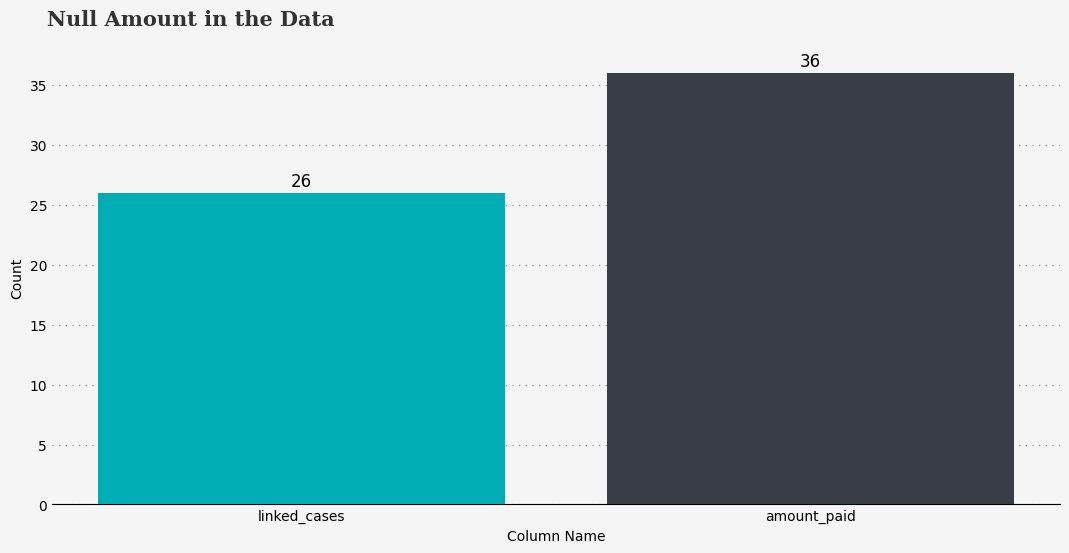

In [142]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')

x = np.arange(1, len(df_Null)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=df_Null, color=["#00ADB5", '#393E46'], zorder=3)
ax.set_xticks(x)
ax.set_xticklabels(df_Null.index)

ax.set_ylabel('Count')
ax.set_xlabel('Column Name')

ax.text(0.5, 40, 'Null Amount in the Data', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")

for i, j in enumerate(df_Null):
    ax.annotate(f'{j}', xy=(i+1, j+1), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)


- There were **2 columns** that has null values in it. Which is **liked_cases** and **amount_paid** column
- **amount_paid** column has higher null amount than linked_cases column

We can replace the missing value as per instruction:
- **amount_paid** -> Replace with median
- **liked_cases** -> Replace with FALSE

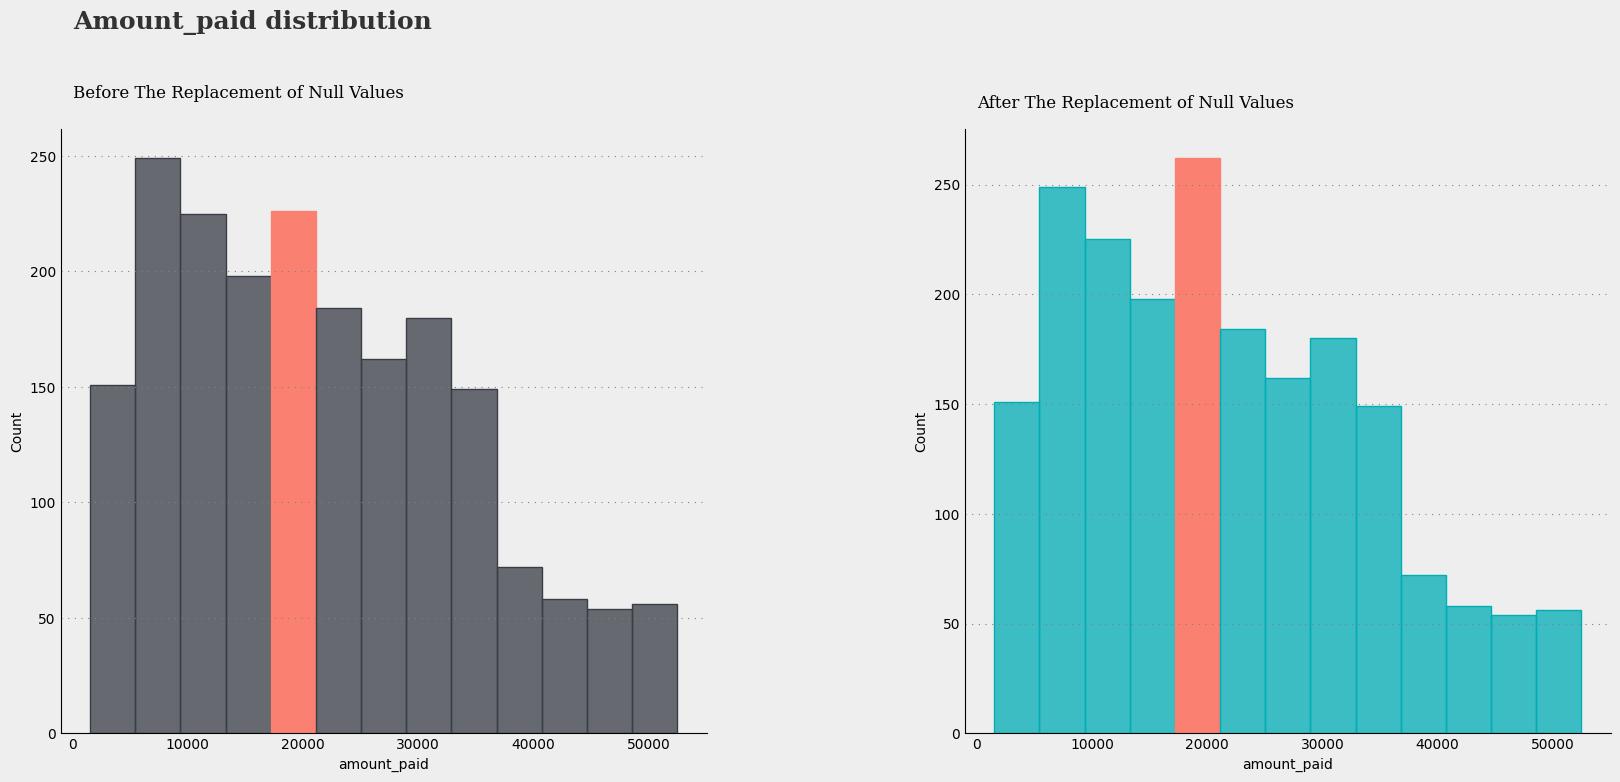

In [143]:
fig = plt.figure(figsize=(20, 8), dpi=100)

fig.patch.set_facecolor('#EEEEEE')
palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


# AX0 (Histogram before null replace)
ax0.text(1, 305, 'Amount_paid distribution', fontsize=18,
         fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(1, 275, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax0.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist1 = sns.histplot(data=df, x="amount_paid", ax=ax0,
             color=palette[1],  bins=13, edgecolor=palette[1])
hist1.patches[4].set_facecolor('salmon')
hist1.patches[4].set_edgecolor('salmon')


# AX1 (Histogram after null replace)
ax1.text(1, 285, 'After The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
# Replace Null
df['amount_paid'].fillna(df['amount_paid'].median(), inplace=True)
ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist2 = sns.histplot(data=df, x="amount_paid", ax=ax1,
             color=palette[0],  bins=13, edgecolor=palette[0])
hist2.patches[4].set_facecolor('salmon')
hist2.patches[4].set_edgecolor('salmon')


for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].set_facecolor('#EEEEEE')
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


- Take a closer look at the highlighted bar, the count **increased** when we replace the null value with the **median** of the column. So we can conclude that the **median** is around **20000**. Here is the boxplot for the validation

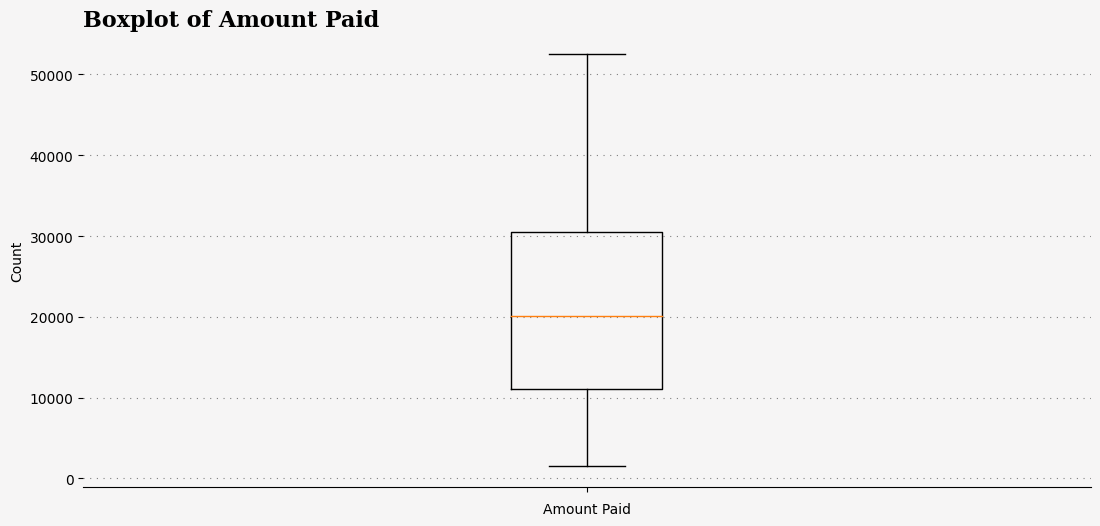

In [144]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')



ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
box = ax.boxplot(df['amount_paid'])
ax.set_xticklabels([])

ax.text(0.5, 56000, 'Boxplot of Amount Paid',
         fontfamily='serif', fontsize=16, fontweight='bold')

ax.set_ylabel('Count')
ax.set_xlabel('Amount Paid')

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)



- Here we can see the median of the column is 20000, showed by the orange line in the middle of the box. We replace the null values with the median .Hence the shape of the box won't change

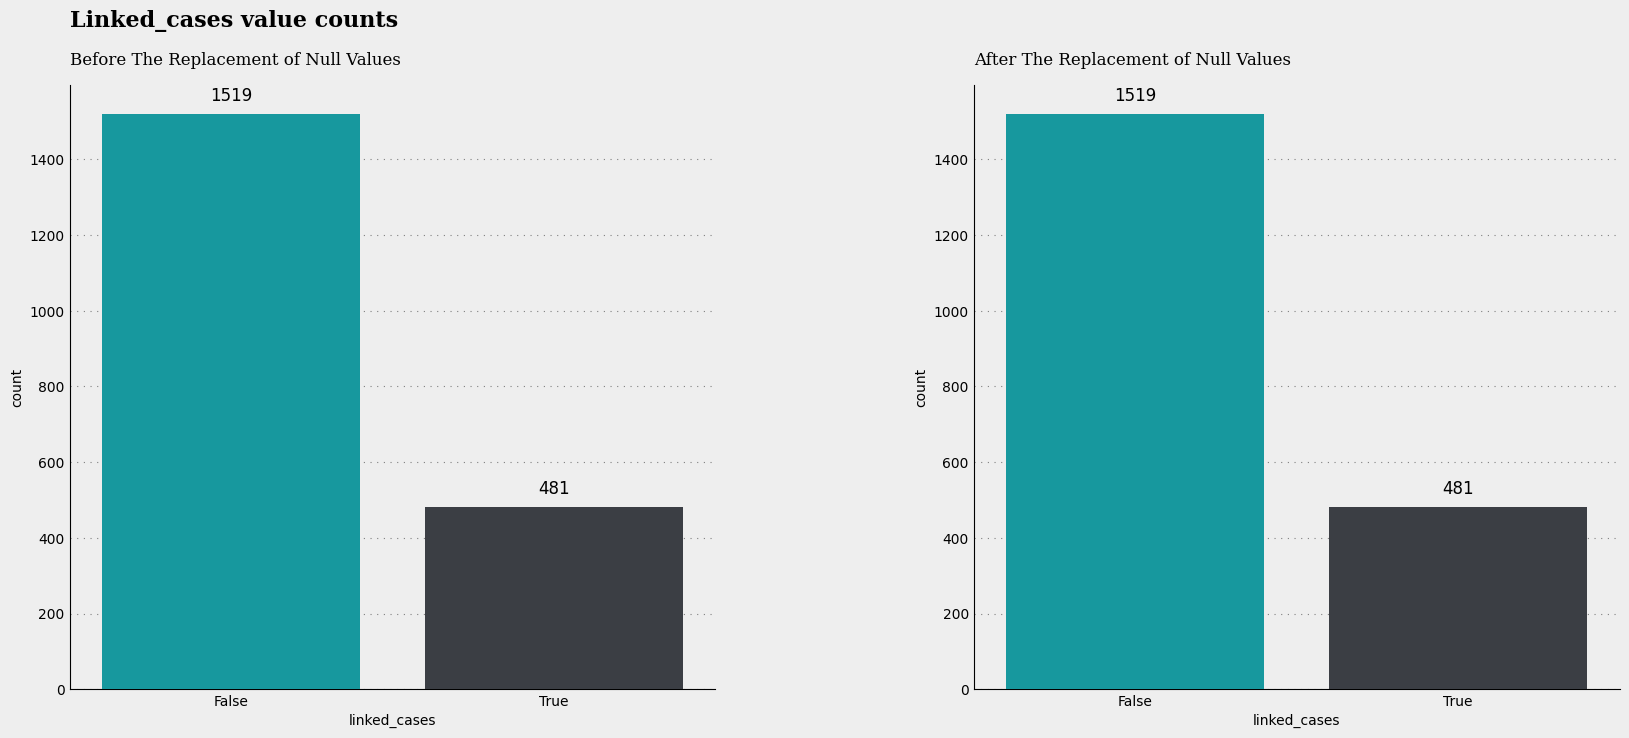

In [166]:
fig = plt.figure(figsize=(20, 8), dpi=100)

fig.patch.set_facecolor('#EEEEEE')
palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.text(-0.5, 1750, 'Linked_cases value counts',
         fontfamily='serif', fontsize=16, fontweight='bold')

# AX0 (Countplot before null replace)
ax0.text(-0.5, 1650, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax0,palette=palette,zorder=3)

for i, j in enumerate(df['linked_cases'].value_counts()):
    ax0.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

# AX1 (Countplot after null replace)
# Replace Null
df['linked_cases'].fillna(df['linked_cases'][0], inplace=True)

ax0.text(2.3, 1650, 'After The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
for i, j in enumerate(df['linked_cases'].value_counts()):
    ax1.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax1,palette=palette,zorder=3)



for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].set_facecolor('#EEEEEE')
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


- The counts of 'False' value increased when we replace the null with 'False'

### c. Describe what you did to make values match the description if they did not match.

- **number_of_claims** :
Remove the currency in front of the values so only digit number exist in the column

## Task 2

### a.State which category of the variable location has the most observations

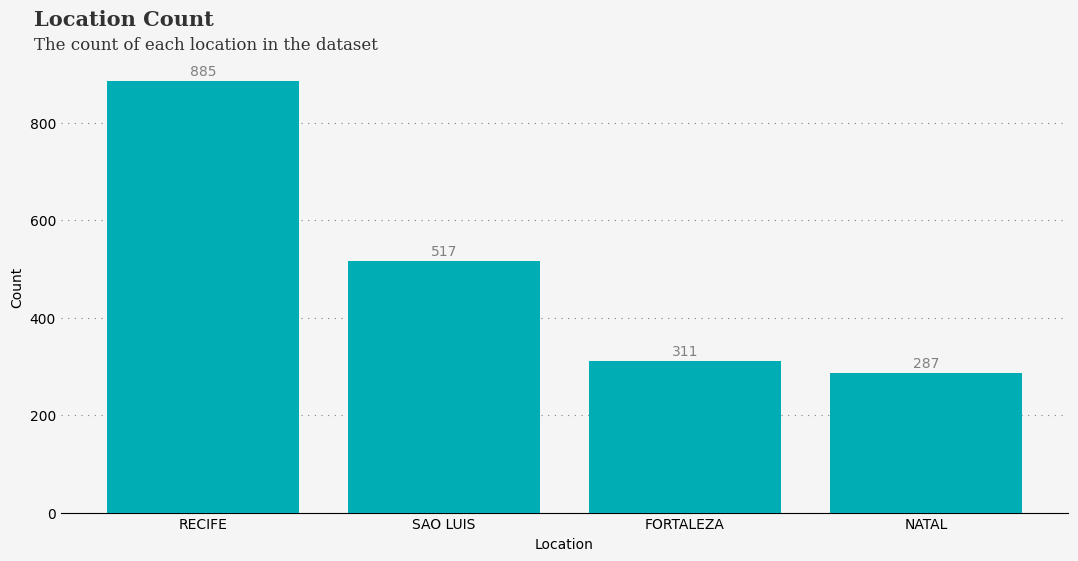

In [146]:
dfLoc = df['location'].value_counts()

fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')

x = np.arange(1, len(dfLoc)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=dfLoc, zorder=3,color=['#00ADB5'])
ax.set_xticks(x)
ax.set_xticklabels(dfLoc.index)

ax.set_ylabel('Count')
ax.set_xlabel('Location')

ax.text(0.3, 1000, 'Location Count', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
ax.text(0.3, 950, 'The count of each location in the dataset', fontsize=12,
        fontweight='light', fontfamily='serif', color="#323232")

for i, j in enumerate(dfLoc):
    ax.annotate(f'{j}', xy=(i+1, j+20), color='gray',
                horizontalalignment='center', verticalalignment='center', fontsize=10)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)

- **Bar chart** used to compare each **location** that is appear in the dataset


- The following is the order of the count of locations that appear in the dataset:
  - **RECIFE** (885)
  - **SAO LUIS** (517)
  - **FORTALEZA** (311)
  - **NATAL** (287)


- **RECIFE** is the location that has the most observation based on the graph that showed above

### b. Explain whether the observations are balanced across categories of the variable location

- The observation can be callled **balance** if all the categories have the same proportion between each other.
- From the bar chart above, it is already clear that the amount of location for each category is inbalance.
- For easier perspective to compare the proportion of each category, we can visualize it using pie chart

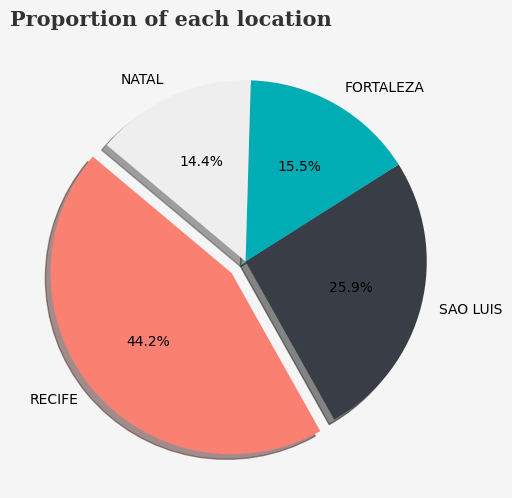

In [147]:
dfLoc = df['location'].value_counts()

fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')

ax.pie(dfLoc, explode=(0.1, 0, 0, 0), labels=dfLoc.index,colors=['salmon','#393E46','#00ADB5','#EEEEEE'],
autopct='%1.1f%%', shadow=True, startangle=140)

ax.text(-1.3, 1.3, 'Proportion of each location', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
plt.show()

- Each location should've around 25% of the total observation to can be called balance
- But **RECIFE** itself already took 44.2% of the total observation in the data
- So we can conclude that the location is not balance for each categories in the data

## Task 3

### Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

- Histogram is a common and effective visual representation to explain the distribution of an univariate variable.
- With histogram, we can describe shape, center, spread, skewness, and any distinctive features, such as outliers from the data. 

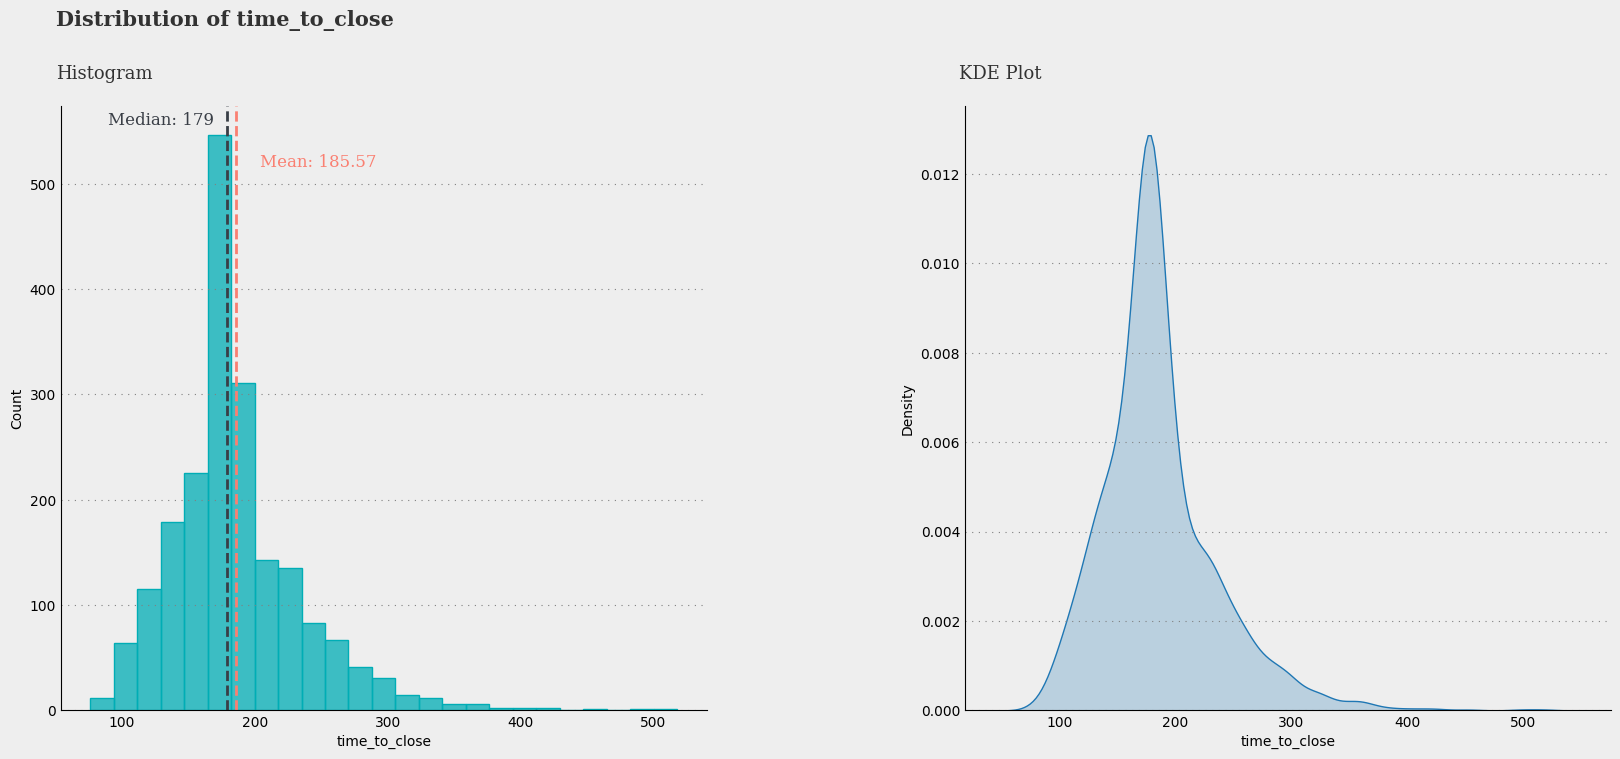

In [165]:
fig = plt.figure(figsize=(20, 8), dpi=100)

fig.patch.set_facecolor('#EEEEEE')
palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax0.text(50, 650, 'Distribution of time_to_close', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")

ax0.text(50, 600, 'Histogram', fontsize=13,
        fontweight='light', fontfamily='serif', color="#323232")

ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
sns.histplot(data=df, x="time_to_close",
             color=palette[0],   edgecolor=palette[0],bins=25,ax=ax0)

ax0.axvline(df['time_to_close'].mean(), color='salmon', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = ax0.get_ylim()
ax0.text(df['time_to_close'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['time_to_close'].mean()),color='salmon',fontsize=12,fontweight='light', fontfamily='serif')


ax0.axvline(df['time_to_close'].median(), linestyle='dashed', linewidth=2,color='#393E46')
min_ylim, max_ylim = ax0.get_ylim()
ax0.text(df['time_to_close'].median()*0.5, max_ylim*0.97, 'Median: {:.0f}'.format(df['time_to_close'].median()),color='#393E46',fontsize=12,fontweight='light', fontfamily='serif')

sns.kdeplot(df, x="time_to_close",fill=True,ax=ax1)

ax0.text(730, 600, 'KDE Plot', fontsize=13,
        fontweight='light', fontfamily='serif', color="#323232")



for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].set_facecolor('#EEEEEE')
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))
locals()["ax"].tick_params(length=0)

- From the figures above we can see that the data is centered or spread around the minimum value of the column. So what's happen here?
  - There's skewness in the distribution. Skewness defines the asymmetry of a distribution
  - A skewed distribution occurs when one tail is longer than the other.



- There were 2 kind of skewnes,right skewed (positively skewed) and left-skewed (negatively skewed). 
- The distribution that we got is Right Skewed (Positively Skewed). How?
  - Right skewed distributions occur when the long tail is on the right side of the distribution. As we can see in the figure above that there's long tail on the right side of the distribution
  - This condition occurs because probabilities taper off more slowly for higher values. This is true, as we can see, the data tends to spread in the minimun values